#### Name: An Huynh
#### Course: AIT 626 - 101
#### Due Date: January 27 2026

In [78]:
from bs4 import BeautifulSoup
import requests
import re
import string
import nltk
from nltk import wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AnhHuynh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/AnhHuynh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Task 1

#### 1.1. Web Scraping

In [79]:
def get_page_content(url):
    result = ""
    page = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}) # Using Mozilla user-agent so the browser can idenity itself when generate content on Wikipedia
    soup = BeautifulSoup(page.content, "lxml")
    content = soup.find("div", class_="mw-parser-output")
    pars = content.find_all("p")

    for p in pars:
        result += p.text
    return result.lower() 


URL = "https://en.wikipedia.org/wiki/Natural_language_processing"
content = get_page_content(URL)
print(content)



natural language processing (nlp) is the processing of natural language information by a computer. nlp is a subfield of computer science and is closely associated with artificial intelligence. nlp is also related to information retrieval, knowledge representation, computational linguistics, and linguistics more broadly.[1]
major processing tasks in an nlp system include: speech recognition, text classification, natural language understanding, and natural language generation.
natural language processing has its roots in the 1950s.[2] already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. the proposed test includes a task that involves the automated interpretation and generation of natural language.
the premise of symbolic nlp is often illustrated using john searle's chine

#### 1.2

In [80]:
def remove_punctuation(text):
    return "".join([x for x in text if x not in string.punctuation])

def get_clean_words(text):
    stop_words = set(stopwords.words("english"))
    stop_words.update({"e", "g"})

    words = wordpunct_tokenize(text)

    words = [remove_punctuation(word) for word in words]
    words = [word for word in words if word != ""]

    words = [word for word in words if word not in stop_words]

    return words

words = get_clean_words(content)
print(words[0:20])

['natural', 'language', 'processing', 'nlp', 'processing', 'natural', 'language', 'information', 'computer', 'nlp', 'subfield', 'computer', 'science', 'closely', 'associated', 'artificial', 'intelligence', 'nlp', 'also', 'related']


#### 1.3

In [81]:
def get_word_frequencies(words):
    return FreqDist(words)

def get_weighted_frequencies(words):
    freq_dist = FreqDist(words)
    total_words = len(words)

    return {word: count/total_words for word, count in freq_dist.items()}
    
freq_dist = get_word_frequencies(words)
weighted_freq = get_weighted_frequencies(words)

print("Top 20 words frequencies:\n")
for word, count in freq_dist.most_common(20):
    print(f"{word}: {count}")


Top 20 words frequencies:

nlp: 17
language: 16
natural: 13
cognitive: 13
processing: 11
linguistics: 9
tasks: 9
based: 9
approach: 7
intelligence: 6
rules: 6
approaches: 6
statistical: 6
machine: 5
artificial: 4
computational: 4
symbolic: 4
grammar: 4
neural: 4
rule: 4


In [82]:
# Calculate and print out top 20 words frequencies
top_weighted = sorted(
    weighted_freq.items(), # <-- iterable
    key=lambda x: x[1], # <-- sort by frequency, not the word
    reverse=True # <--sort order
)[:20]

print("Top 20 words weighted frequencies:\n")
for item in top_weighted:
    print(item)

Top 20 words weighted frequencies:

('nlp', 0.02910958904109589)
('language', 0.0273972602739726)
('natural', 0.02226027397260274)
('cognitive', 0.02226027397260274)
('processing', 0.018835616438356163)
('linguistics', 0.015410958904109588)
('tasks', 0.015410958904109588)
('based', 0.015410958904109588)
('approach', 0.011986301369863013)
('intelligence', 0.010273972602739725)
('rules', 0.010273972602739725)
('approaches', 0.010273972602739725)
('statistical', 0.010273972602739725)
('machine', 0.008561643835616438)
('artificial', 0.00684931506849315)
('computational', 0.00684931506849315)
('symbolic', 0.00684931506849315)
('grammar', 0.00684931506849315)
('neural', 0.00684931506849315)
('rule', 0.00684931506849315)


#### 1.4 + 1.5 

In [83]:
# Define function to score sentences based on frequencies
def score_sentence(text, weighted_freq):
    # Split text into sentences
    sentences = sent_tokenize(text)
    sent_score = []

    
    for sent in sentences:
        # Get clean words
        words = get_clean_words(sent)

        # Compute score
        score = sum(weighted_freq.get(word,0) for word in words)

        # Store sentence and score
        sent_score.append((sent,score))
    
    return sent_score



In [84]:
# Score and rank sentences

sentence_scores = score_sentence(content, weighted_freq)

top_sentences = sorted(
  sentence_scores,
  key=lambda x: x[1],
  reverse=True
)

for sent, score in top_sentences:
  print (f"Score: {score:.4f} | Sentence: {sent}" )


Score: 0.2945 | Sentence: as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[52] with two defining aspects:
ties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.
Score: 0.2483 | Sentence: [59] likewise, ideas of cognitive nlp are inherent to neural models multimodal nlp (although rarely made explicit)[60] and developments in artificial intelligence, specifically tools and technologies using large language model approaches[61] and new directions in artificial general intelligence based on the free energy principle[62] by british neuroscientist and theoretician at university college london karl j. friston.
Score: 0.2072 | Sentence: the premise of symbolic nlp is often illustrated using john searle's chinese room thought experiment:

#### 1.6

In [85]:
# Define summary by sentence count

def summarize_by_sent_count(text, weighted_freq, n_sentences):
  scored_sentences = score_sentence(text, weighted_freq)

  top_sentences = sorted(
    scored_sentences,
    key = lambda x: x[1],
    reverse = True
  )

  summary = [sent for sent, score in top_sentences[:n_sentences]]

  return " ".join(summary)

In [86]:
# Define summary by word count
def summarize_by_word_count(text, weighted_freq, max_words):
  scored_sentences = score_sentence(text, weighted_freq)

  top_sentences = sorted(
    scored_sentences,
    key = lambda x: x[1],
    reverse = True
  )

  summary_1 = []
  word_count = 0

  for sent, score in top_sentences:
    sent_word = sent.split()
    if word_count + len(sent_word) <= max_words:
      summary_1.append(sent)
      word_count += len(sent_word)
    else:
      break
  return " ".join(summary_1)

In [87]:
# Define summary on percentage 

def summarize_by_percentage(text, weighted_freq, percentage):
  total_words = len(text.split())
  max_words = int(total_words * percentage)

  scored_sentences = score_sentence(text, weighted_freq)

  top_sentences = sorted(
    scored_sentences,
    key = lambda x: x[1],
    reverse = True
  )

  summary_2 = []
  current_word_count = 0

  for sent, score in top_sentences:
    sent_word_count = len(sent.split())

    if current_word_count + sent_word_count <= max_words:
      summary_2.append(sent)
      current_word_count += sent_word_count 
    else:
      break 

  return " ".join(summary_2)

  


In [88]:
print("Summary by Sentence Count (5 sentences)\n")
print(summarize_by_sent_count(content, weighted_freq, 5))

print("\nSummary by Word Count (100 words)\n")
print(summarize_by_word_count(content, weighted_freq, 100))

print("\nSummary by Percentage (20%)\n")
print(summarize_by_percentage(content, weighted_freq, 0.20))

Summary by Sentence Count (5 sentences)

as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[52] with two defining aspects:
ties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s. [59] likewise, ideas of cognitive nlp are inherent to neural models multimodal nlp (although rarely made explicit)[60] and developments in artificial intelligence, specifically tools and technologies using large language model approaches[61] and new directions in artificial general intelligence based on the free energy principle[62] by british neuroscientist and theoretician at university college london karl j. friston. the premise of symbolic nlp is often illustrated using john searle's chinese room thought experiment: given a collection of rules (e.g., a

### Task 2

#### 2.1

In [89]:
def generate_n_grams(text,n):
  tokens = nltk.word_tokenize(text.lower())
  grams = ngrams(tokens, n)
  return [' '.join(g) for g in grams]

# a
n2_grams = generate_n_grams(content, n=2)
print("\nbi-grams\n")
print(n2_grams[:20])

n3_grams = generate_n_grams(content, n=3)
print("\ntri-grams\n")
print(n3_grams[:20])

n4_grams = generate_n_grams(content, n=4)
print("\n4-grams\n")
print(n4_grams[:20])



bi-grams

['natural language', 'language processing', 'processing (', '( nlp', 'nlp )', ') is', 'is the', 'the processing', 'processing of', 'of natural', 'natural language', 'language information', 'information by', 'by a', 'a computer', 'computer .', '. nlp', 'nlp is', 'is a', 'a subfield']

tri-grams

['natural language processing', 'language processing (', 'processing ( nlp', '( nlp )', 'nlp ) is', ') is the', 'is the processing', 'the processing of', 'processing of natural', 'of natural language', 'natural language information', 'language information by', 'information by a', 'by a computer', 'a computer .', 'computer . nlp', '. nlp is', 'nlp is a', 'is a subfield', 'a subfield of']

4-grams

['natural language processing (', 'language processing ( nlp', 'processing ( nlp )', '( nlp ) is', 'nlp ) is the', ') is the processing', 'is the processing of', 'the processing of natural', 'processing of natural language', 'of natural language information', 'natural language information by'

#### 2.2

<FreqDist with 1025 samples and 1060 outcomes>
[('natural language processing', 7), ('of natural language', 3), ('( e.g. ,', 3), ('language processing .', 3), ('grammar , [', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('. nlp is', 2), ('artificial intelligence .', 2), ('natural language understanding', 2), ('natural language .', 2), ('of symbolic nlp', 2), ('in the late', 2), ('the late 1980s', 2), (', however ,', 2), ('in natural language', 2), ('the introduction of', 2), ('rule-based approaches .', 2), ('the old rule-based', 2)]


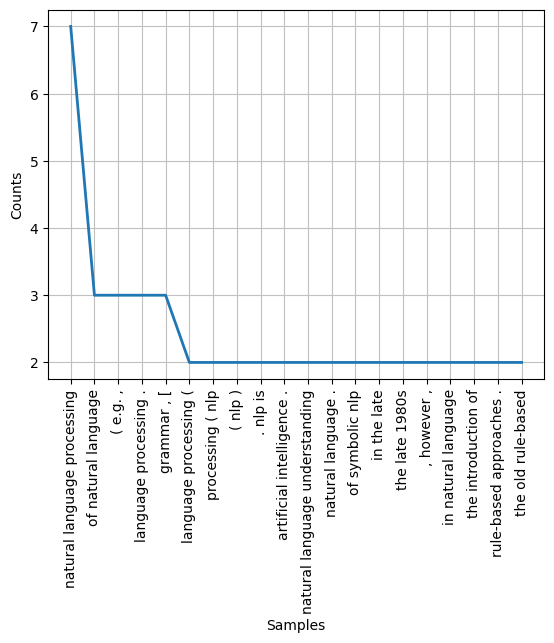

In [90]:
# a

def process_n_grams(n):
    n_grams = generate_n_grams(content,n)
    fdist_n_grams = FreqDist(n_grams)
    print(fdist_n_grams)
    print(fdist_n_grams.most_common(20))
    fdist_n_grams.plot(20)
    plt.show()


process_n_grams(3)



In [91]:
# b
def get_weighted_freq(freq_dist):
    max_count = freq_dist.most_common(1)[0][1] # highest frequency of any n-grams
    new_freq = {item: count/max_count for item, count in freq_dist.items()}
    return new_freq

fdist_3gram = FreqDist(n3_grams)
x = get_weighted_freq(fdist_3gram)
x

{'natural language processing': 1.0,
 'language processing (': 0.2857142857142857,
 'processing ( nlp': 0.2857142857142857,
 '( nlp )': 0.2857142857142857,
 'nlp ) is': 0.14285714285714285,
 ') is the': 0.14285714285714285,
 'is the processing': 0.14285714285714285,
 'the processing of': 0.14285714285714285,
 'processing of natural': 0.14285714285714285,
 'of natural language': 0.42857142857142855,
 'natural language information': 0.14285714285714285,
 'language information by': 0.14285714285714285,
 'information by a': 0.14285714285714285,
 'by a computer': 0.14285714285714285,
 'a computer .': 0.14285714285714285,
 'computer . nlp': 0.14285714285714285,
 '. nlp is': 0.2857142857142857,
 'nlp is a': 0.14285714285714285,
 'is a subfield': 0.14285714285714285,
 'a subfield of': 0.14285714285714285,
 'subfield of computer': 0.14285714285714285,
 'of computer science': 0.14285714285714285,
 'computer science and': 0.14285714285714285,
 'science and is': 0.14285714285714285,
 'and is close

In [92]:
#c
def calculate_sent_scores_ngrams(sent_tokens, ngram_freqs, n_grams):
    sentence_scores = {}
    freqs = get_weighted_freq(ngram_freqs)

    for sent in sent_tokens:
        words = get_clean_words(sent)
        sent_grams = list(ngrams(words,n_grams))

        score = sum(
            freqs.get(ng,0) for ng in sent_grams
        )

        sentence_scores[sent] = score
    return sentence_scores


In [93]:
sentences = sent_tokenize(content)
n_grams = 3

freq_dist_ngram = FreqDist(ngrams(words,n_grams))

sentence_score = calculate_sent_scores_ngrams(
    sentences,
    freq_dist_ngram,
    n_grams
)

sentence_score

{'natural language processing (nlp) is the processing of natural language information by a computer.': 1.9999999999999996,
 'nlp is a subfield of computer science and is closely associated with artificial intelligence.': 0.857142857142857,
 'nlp is also related to information retrieval, knowledge representation, computational linguistics, and linguistics more broadly.': 1.2857142857142854,
 '[1]\nmajor processing tasks in an nlp system include: speech recognition, text classification, natural language understanding, and natural language generation.': 2.285714285714285,
 'natural language processing has its roots in the 1950s.': 1.2857142857142856,
 '[2] already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.': 3.142857142857142,
 'the proposed test includes a task that in

In [94]:
# d
def summarize_by_sent_count_ngrams(sent_scores, top_n):
    top_sentences = sorted(
        sent_scores.items(),
        key = lambda x: x[1],
        reverse = True
    )[:top_n]

    summary = " ".join(sent for sent, score in top_sentences)

    return summary 

summary_3gram = summarize_by_sent_count_ngrams(sentence_score, 5)
print(summary_3gram)

[59] likewise, ideas of cognitive nlp are inherent to neural models multimodal nlp (although rarely made explicit)[60] and developments in artificial intelligence, specifically tools and technologies using large language model approaches[61] and new directions in artificial general intelligence based on the free energy principle[62] by british neuroscientist and theoretician at university college london karl j. friston. as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[52] with two defining aspects:
ties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s. nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cognitive gr

#### 2.3

* The first method is word-based (unigram) text summarization. This method tokenizes text into single word. It then computes word frequencies, and weight words by frequencies. It scores sentences by sum of word weights. This method is simple and fast, but it causes loss of meaning and context. For example, 'natural language' is splitted into 'natural' and 'language', which represents 2 different meaning while in fact, this word conveys a single meaning when staying together. This method is useful for short and simple text.

* The second method tokenizes text into phrases of n words. It score sentences based on n-grams weight. This method preserve the text context and meaning; however, it requires more data. Therefore, this method works for long text like academic text, wikipedia articles, technial domain documentation.

#### 2.4



References: <br>
<i>[1] Dr. Liao. Lab 2 Instructions and hints.</i><br>
<i>[2] Dr. Liao. Text Summarization Lecture Slides.</i><br>
<i>[3]...[</i><br>